In [1]:
from dask.distributed import Client, progress

from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=40)
cluster

distributed.scheduler - INFO - Clear task state
distributed.scheduler - INFO -   Scheduler at:  tcp://10.32.16.105:33691
distributed.scheduler - INFO -   dashboard at:                     :8787


In [2]:
## path for mdules
import sys
sys.path.insert(0,"/home/jovyan/xscale")
import xscale


sys.path.insert(0,"/home/jovyan/eNATL60-plots-paper/common-lib/")
import GriddedData

## imports

import numpy as np
import numpy.ma as ma
import xarray as xr
import time

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.cm as mplcm
seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import matplotlib.pyplot as plt

import glob
import os 

%matplotlib inline

In [3]:
import gcsfs
fs = gcsfs.GCSFileSystem('pangeo-181919', requester_pays=True)


In [4]:
zmap_grid = fs.get_mapper('pangeo-meom/eNATL60-I/eNATL60-mesh-mask')
ds_grid = xr.open_zarr(zmap_grid)


distributed.scheduler - INFO - Register tcp://10.32.5.3:37909
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.5.3:37909
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.13.13:44257
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.13.13:44257
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.15.17:41029
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.15.17:41029
distributed.core - INFO - Starting established connection


In [5]:
ds_grid

<xarray.Dataset>
Dimensions:       (t: 1, x: 8354, y: 4729, z: 300)
Dimensions without coordinates: t, x, y, z
Data variables:
    e1f           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1t           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1u           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1v           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2f           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2t           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2u           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2v           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e3t_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3t_1d        (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    e3u_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3v_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3w_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3w_1d        (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ff            (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    fmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    fmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gdept_0       (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdept_1d      (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    gdepu         (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepv         (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepw_0       (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepw_1d      (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    glamf         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamt         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamu         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamv         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphif         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphit         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphiu         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphiv         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    isfdraft      (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    mbathy        (t, y, x) int16 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    misf          (t, y, x) int16 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    time_counter  (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    tmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    tmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    umask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    umaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    vmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    vma

In [6]:
navlat= ds_grid['nav_lat']
navlon= ds_grid['nav_lon']


In [7]:
navlat

<xarray.DataArray 'nav_lat' (y: 4729, x: 8354)>
dask.array<zarr, shape=(4729, 8354), dtype=float32, chunksize=(4729, 8354), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [8]:
navlat_rechunk=navlat.chunk({'y':1000,'x':1000})
navlon_rechunk=navlon.chunk({'y':1000,'x':1000})


In [11]:
navlat_rechunk

<xarray.DataArray 'nav_lat' (y: 4729, x: 8354)>
dask.array<rechunk-merge, shape=(4729, 8354), dtype=float32, chunksize=(1000, 1000), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [9]:
mgrd = GriddedData.grid2D(navlat=navlat_rechunk, navlon=navlon_rechunk)


In [18]:
mgrd.shape

(4729, 8354)

In [20]:
jpj,jpi = mgrd.shape
x_offset=0
y_offset=0
crs_factor=60
jcrs, icrs = crs_factor, crs_factor
jsize = jpj - (jpj - y_offset) % jcrs
isize = jpi - (jpi - x_offset) % icrs 

In [21]:
print(jsize,isize)

4680 8340


In [22]:
crs_shape = ( isize / jcrs , isize / icrs )
cut_array = lambda array2D:array2D[...,y_offset:jsize,x_offset:isize]

In [23]:
mgrd.t_surf

<xarray.DataArray 'nav_lat' (y: 4729, x: 8354)>
dask.array<mul, shape=(4729, 8354), dtype=float32, chunksize=(1000, 1000), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [24]:
weights = cut_array(mgrd.t_surf)

In [25]:
weights

<xarray.DataArray 'nav_lat' (y: 4680, x: 8340)>
dask.array<getitem, shape=(4680, 8340), dtype=float32, chunksize=(1000, 1000), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

distributed.utils_perf - INFO - full garbage collection released 156.11 MB from 175 reference cycles (threshold: 10.00 MB)


In [26]:
def boxcar_factor_test(array2D,icrs=3,jcrs=3):
    """Test whether the shape of array2D is suited to coarsening with icrs,jcrs
    """
    jpj, jpi = array2D.shape
    if jpj%jcrs==0 and jpi%icrs==0:
       return True
    else:
       return False
test=boxcar_factor_test(weights,icrs=icrs,jcrs=jcrs)
print(test)

True


In [31]:
jpj, jpi = weights.shape
print(jpi/icrs)

139.0


In [36]:
weights_np=weights.values

In [37]:
def boxcar_reshape(array2D,icrs=3,jcrs=3):
    """Return a 3D array where values in boxes added in extra dimensions 
    """
    print('check changes')
    if not(boxcar_factor_test(array2D,icrs=icrs,jcrs=jcrs)):
       print("shape and coarsening factors are not compatible")
       return
    jpj, jpi = array2D.shape
    # target shape is shape = (jcrs, icrs, jpj/jcrs, jpi/icrs)
    t = np.reshape(array2D,(jpj,-1,icrs)) 		# (jpj, jpi/icrs, icrs)
    tt = t.swapaxes(0,2)				# (icrs,jpi/icrs, jpi)
    ttt = np.reshape(tt,(icrs,jpi//icrs,-1,jcrs)) 	# (icrs,jpi/icrs,jpj/jcrs, jcrs)
    tttt = ttt.swapaxes(1,3)  				# (icrs,jcrs,jpj/jcrs, jpi/icrs)
    ttttt = tttt.swapaxes(0,1) 				# (jcrs,icrs,jpj/jcrs, jpi/icrs)
    return ttttt
reshaped = boxcar_reshape(weights_np,icrs=icrs,jcrs=jcrs)

In [38]:
dum,dum,jpj,jpi = reshaped.shape

In [40]:
crs_area = reshaped.reshape((icrs*jcrs,jpj,jpi))

In [41]:
crs_shape = crs_area.shape

In [43]:
ff= ds_grid['ff']
ff

<xarray.DataArray 'ff' (t: 1, y: 4729, x: 8354)>
dask.array<zarr, shape=(1, 4729, 8354), dtype=float64, chunksize=(1, 4729, 8354), chunktype=numpy.ndarray>
Dimensions without coordinates: t, y, x

In [49]:
def boxcar_ravel(array2D,icrs=3,jcrs=3):
    """Return a 3D array where values in boxes are broadcasted along the third axis.
        output shape is (icrs*jcrs,jpj_crs,jpi_csr)
    """
    if not(boxcar_factor_test(array2D,icrs=icrs,jcrs=jcrs)):
       print("shape and coarsening factors are not compatible")
       return
    reshaped = boxcar_reshape(array2D,icrs=icrs,jcrs=jcrs)
    dum,dum,jpj,jpi = reshaped.shape
    raveled = reshaped.reshape((icrs*jcrs,jpj,jpi))
    return raveled

rvl = lambda a:boxcar_ravel(a,icrs=crs_factor,jcrs=crs_factor)

In [56]:
ff_cut=cut_array(ff.squeeze())
ffcrs=rvl(ff_cut.values)
ffcrsm=ffcrs.mean(axis=0)

In [59]:
navlat_cut=cut_array(navlat.squeeze())
navlatcrs=rvl(navlat_cut.values)
navlatcrsm=navlatcrs.mean(axis=0)

In [60]:
navlon_cut=cut_array(navlon.squeeze())
navloncrs=rvl(navlon_cut.values)
navloncrsm=navloncrs.mean(axis=0)

In [57]:
ffcrsm.shape

(78, 139)

distributed.core - INFO - Event loop was unresponsive in Scheduler for 5.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


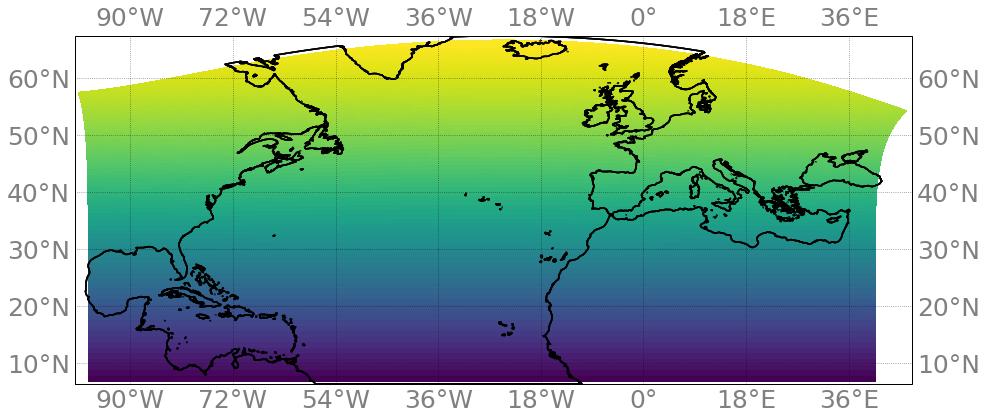

In [70]:
    fig, ax = plt.subplots(1,1,figsize=(15,10))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.autoscale(tight=True)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 25, 'color': 'gray'}
    gl.ylabel_style = {'size': 25, 'color': 'gray'}
    
    ax.tick_params('both',labelsize=25)

    pcolor = ax.pcolormesh(navloncrsm,navlatcrsm,ma.masked_invalid(ffcrsm),alpha=1)
    ax.contour(navlon,navlat,ds_grid.fmask[0,0],alpha=0.5,linewidth=0.000001,antialiased=True,colors='black')


In [67]:
ff[0].min().values

array(1.61185686e-05)

In [68]:
ff[0].max().values

array(0.00013464)

distributed.core - INFO - Event loop was unresponsive in Scheduler for 13.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Scheduler for 13.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


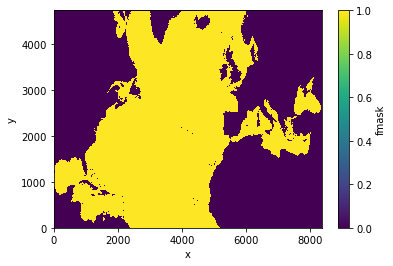

In [69]:
ds_grid.fmask[0,0].plot()